# ANLY 590  HW2

## Problem 1

### Problem 1.1 & Problem 1.2

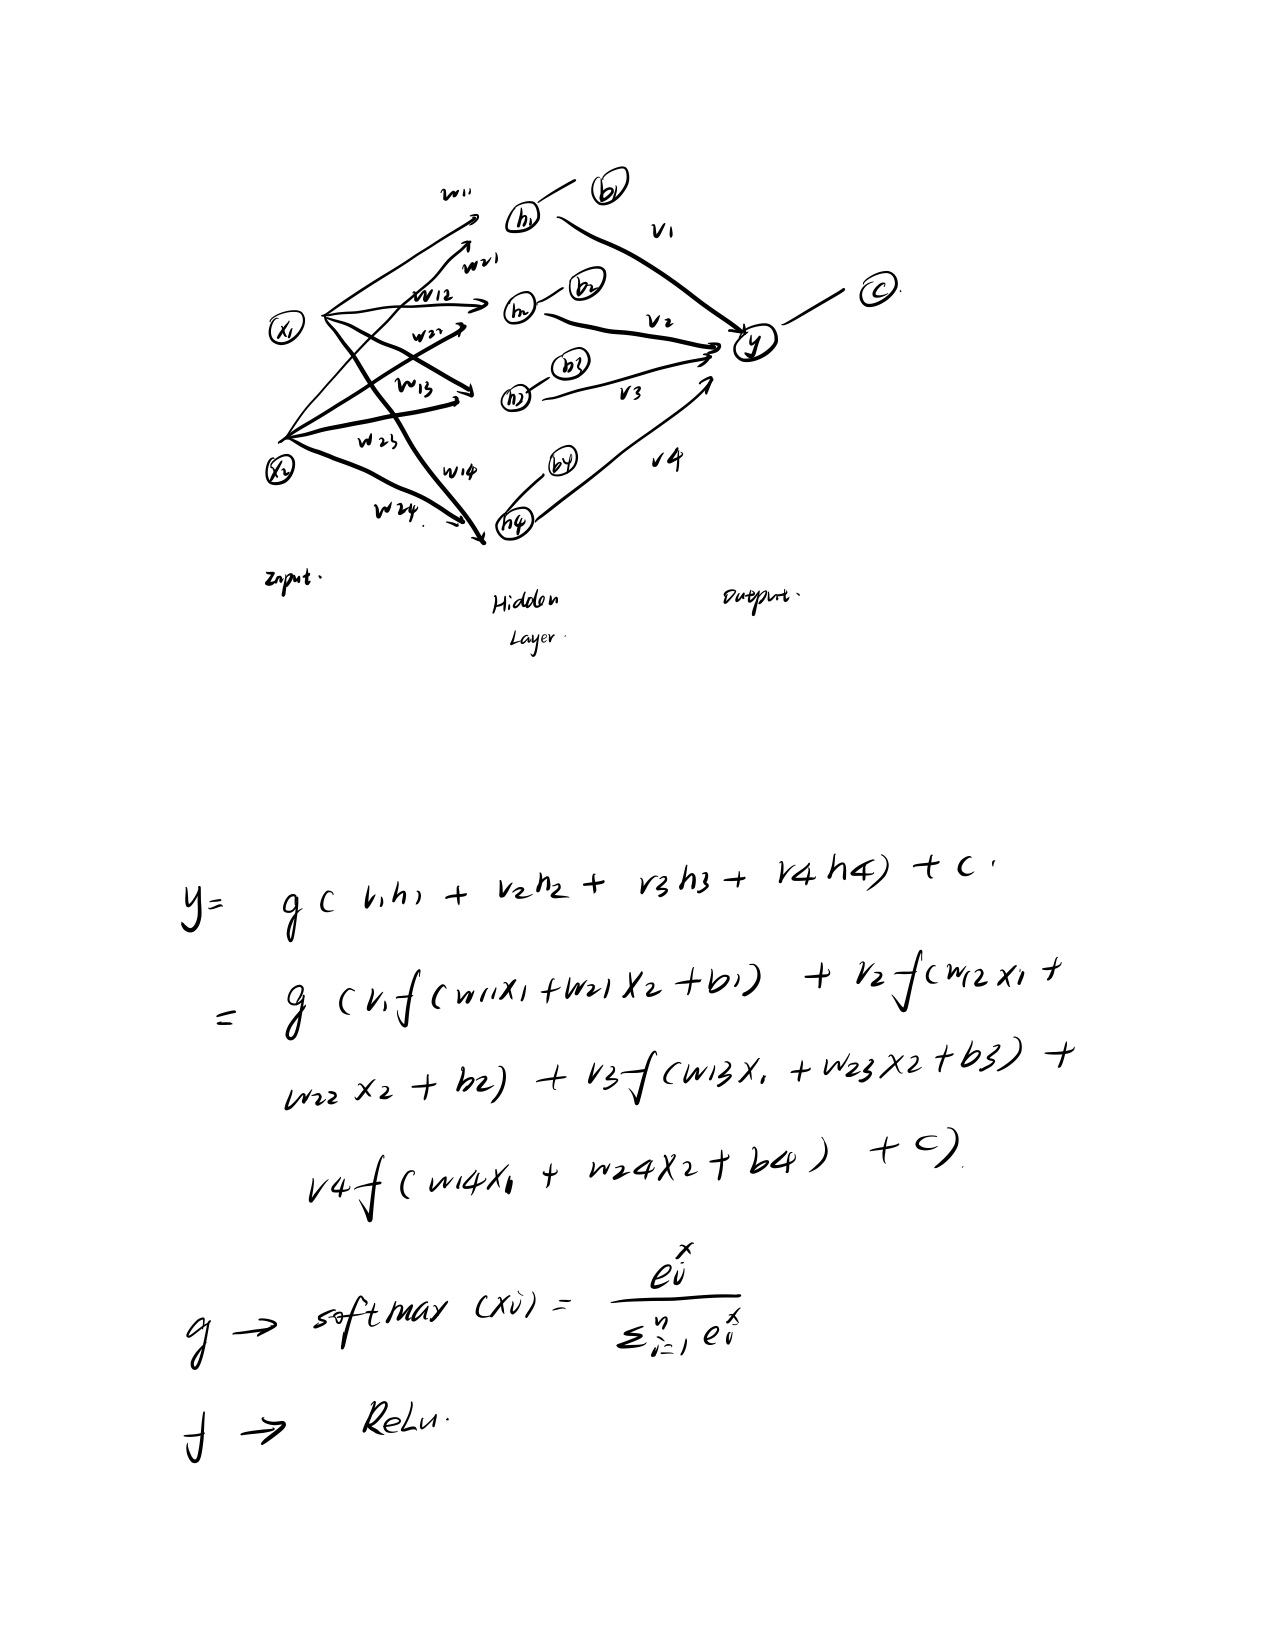

In [8]:
from IPython.display import Image
Image("Neural Network.jpeg")

### Problem 1.3

In [9]:
def relu(x):
    return np.maximum(x,0)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z)))

def ff_nn_2_ReLu(x,w1,v,b,c):
    a = np.dot(x,w1)+b
    h1 = relu(a)
    y = sigmoid(np.dot(h1,v)+c)
    return y

### Problem 1.4

In [10]:
import numpy as np

x = np.array([[1,-1],[0,-1],[0,1]])
w1 = np.array([[1,-1,0,1],[0,0,0.5,1]])
b = np.array([0,0,1,0])
v = np.array([[1,0,-1,1]]).T
c = np.array([1])

ff_nn_2_ReLu(x,w1,v,b,c)

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

## Problem 2

### Problem 2.1

$
\frac{df(x,y)}{dx} = -3x^2-100(2y^2 - x)  \\
\frac{df(x,y)}{dy} = 400y(2y^2-x)
$

### Problem 2.2

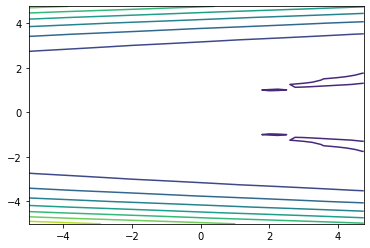

In [11]:
import matplotlib.pyplot as plt

delta = 0.25
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2-X)**2
fig, ax = plt.subplots()
ax.contour(X, Y, Z)

### Problem 2.3

In [12]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 100*(2*y**2-x) 
    df_dy = 400*y*(2*y**2 - x)
    return np.array([df_dx, df_dy])

In [13]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    
    if starting_point is None:
        point = np.random.uniform(-5,-4,size=2)
    else:
        point=starting_point
        
    trajectory=[point]
    
    for i in range(iterations):
        grad=grad_f(point)
        point=point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

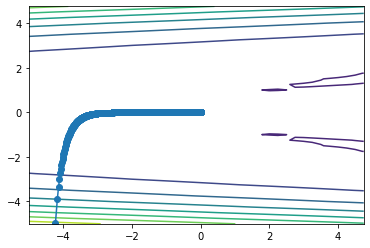

In [14]:
# Learning rate is 0.00001
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate=0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

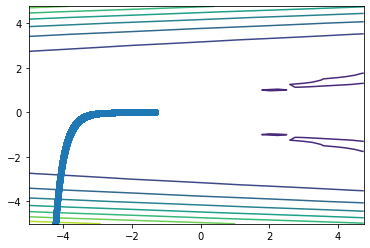

In [15]:
# Learning rate is 0.000001
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate=0.000001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#####  When the learning rate is small, the step size is small.

### Problem 2.4

In [16]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-5,-4,size=2)
    else:
        point=starting_point
        
    trajectory=[point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon * grad
        point = point - v
        trajectory.append(point)
        
        
    return np.array(trajectory)

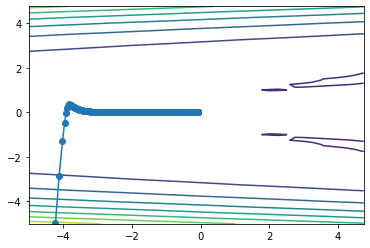

In [17]:
# When epsilon is 0.00002 and alpha is 0.5
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.00002, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

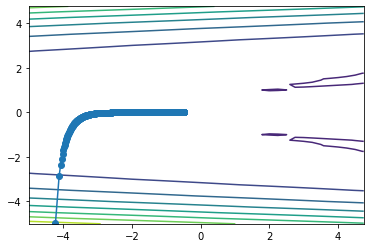

In [18]:
# When epsilon is 0.00002 and alpha is 0.001
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.00002, alpha=.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

##### With the momentum, oscillation behavior reduces, and it also avoides the wate of time in ravine.

## Problem 3

### Problem 3.1

$Given \ that \ we \ have:$

$ \frac{\partial L}{\partial \hat y_{out}} = -(\frac{y_{i}}{\hat y{i}} - \frac{1 - y_{i}}{1 - \hat y{i}})$

$ \frac{\partial \hat y_{out}}{\partial \hat y_{in}} = \sigma(\hat y_{in})(1- \sigma(\hat y_{in}) )$

$Therefore,\ the \ expressions \ of \ the \ gradient \ are:$

$\frac{\partial L}{\partial c} = \frac{\partial L}{\partial \hat y_{out}} \frac{\partial \hat y_{out}}{\partial \hat y_{in}} \frac{\partial \hat y_{in}}{\partial \hat c} = \frac{\partial L}{\partial \hat y_{out}} \frac{\partial \hat y_{out}}{\partial \hat y_{in}} $

$\frac{\partial L}{\partial v_{i}} = \frac{\partial L}{\partial \hat y_{out}} \frac{\partial \hat y_{out}}{\partial \hat y_{in}} \frac{\partial \hat y_{in}}{\partial v_{i}} = \frac{\partial L}{\partial \hat y_{out}} \frac{\partial \hat y_{out}}{\partial \hat y_{in}} h_{out, i}$

$\frac{\partial L}{\partial b_{i}} = \frac{\partial L}{\partial \hat y_{out}}\frac{\partial \hat y_{out}}{\partial \hat y_{in}} \frac{\partial \hat y_{in}}{\partial h_{out,i}} \frac{\partial \hat h_{out,i}}{\partial h_{in,i}}
\frac{\partial \hat h_{in,i}}{\partial b_{i}} = \frac{\partial L}{\partial \hat y_{out}}\frac{\partial \hat y_{out}}{\partial \hat y_{in}} \frac{\partial \hat y_{in}}{\partial h_{out,i}} \frac{\partial \hat h_{out,i}}{\partial h_{in,i}}$

$\frac{\partial L}{\partial W_{ji}} = \frac{\partial L}{\partial \hat y_{out}}\frac{\partial \hat y_{out}}{\partial \hat y_{in}} \frac{\partial \hat y_{in}}{\partial h_{out,i}} \frac{\partial \hat h_{out,i}}{\partial h_{in,i}}
\frac{\partial \hat h_{in,i}}{\partial W_{ji}} =  \frac{\partial L}{\partial \hat y_{out}}\frac{\partial \hat y_{out}}{\partial \hat y_{in}} \frac{\partial \hat y_{in}}{\partial h_{out,i}} \frac{\partial \hat h_{out,i}}{\partial h_{in,i}}x_{j}$

### Problem 3.2

In [19]:
def de_relu(x):
    return np.where(x>0, 1, 0)

def loss_function(y, y_hat):
     return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).sum()
    

def grad_f(x,y,w1,v,b,c):  
    a = np.dot(x,w1)+b
    h1 = relu(a)
    y_hat = sigmoid(np.dot(h1,v)+c)
    Loss = loss_function(y, y_hat)

    dL_dc = (y_hat-y).sum()
    dL_dv = np.dot(h1.T, y_hat - y)
    dL_db = (np.dot(y_hat - y, v.T) * de_relu(a)).sum(axis=0)
    dL_dw = np.dot(x.T, np.dot(y_hat-y, v.T)*de_relu(a))   
    
    return (dL_dw, dL_dv, dL_db, dL_dc)

In [20]:
w1 = np.random.randn(8).reshape(2,4)
v = np.random.randn(4).reshape(4,1)
b = np.random.randn(4).reshape(1,4)
c = np.random.randn(1)

x = np.random.randn(1000).reshape((500,2))
y = np.random.randn(500).reshape((500,1))

grad_f(x,y,w1,v,b,c)

(array([[ 1.10963318e-01,  3.39305077e+00, -4.39566694e+01,
         -8.11611535e+01],
        [ 7.25821162e-02,  6.32740253e+00,  5.90860943e+00,
          1.17571385e+01]]), array([[ 22.36648612],
        [147.4139873 ],
        [190.62709375],
        [ 79.21161781]]), array([ 1.00377528e-01, -2.29600458e+01,  5.70662762e+01,  2.09683188e+02]), 174.29482443048863)

### Problem 3.3

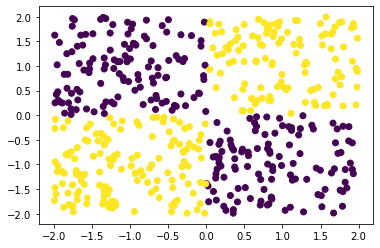

In [21]:
x_xor = np.random.uniform(low = -2,high = 2, size=1000).reshape((500,2))
y_xor = np.zeros((500,1))

y_xor[np.logical_and(x_xor[:,0] > 0, x_xor[:,1] > 0)] = 1
y_xor[np.logical_and(x_xor[:,0] < 0, x_xor[:,1] < 0)] = 1

plt.scatter(x_xor[:,0], x_xor[:,1], c = y_xor[:,0])
plt.show()

### Problem 3.4

In [22]:
x = x_xor
y = y_xor

w1 = np.array([[1, -1, 0,1],
             [0, 0, .5,1]])
b = np.array([0, 0, 1,0])
v = np.array([[1], [0], [-1],[1]])
c = np.array([1])

alpha = 0.001
loss = []

for i in range(1000):
        dL_dw, dL_dv, dL_db, dL_dc = grad_f(x,y,w1,v,b,c)
        
        w1 = w1 - alpha * dL_dw
        b = b - alpha * dL_db
        v = v - alpha * dL_dv
        c = c - alpha * dL_dc
        
        a = np.dot(x,w1)+b
        h1 = relu(a)
        y_hat = sigmoid(np.dot(h1,v) + c)
        loss.append (- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

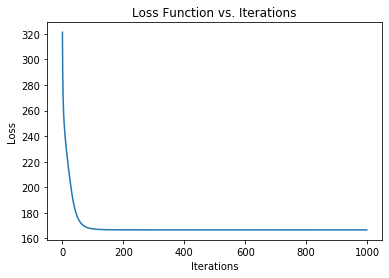

In [23]:
plt.plot(range(0,1000), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function vs. Iterations')
plt.show()

### Problem 3.5

In [24]:
x = x_xor
y = y_xor

w1 = np.array([[1, -1, 0,1],
             [0, 0, .5,1]])
b = np.array([0, 0, 1,0])
v = np.array([[1], [0], [-1],[1]])
c = np.array([1])

velocity = np.zeros(x.size)
params = (w1, v, b, c)

trajectory = []
loss = []

alpha = 0.0001
epsilon = 0.0001

for i in range(5000):    
    gradients = grad_f(x,y,w1,v,b,c)
    new_params = []  
    for (i, m, v) in zip(params, gradients, velocity):
        new_params.append(i - epsilon * m - alpha * v)
        
    velocity = gradients
    params = tuple(new_params)
    
    w1, v, b, c = params
    
    a = np.dot(x,w1)+b
    h1 = relu(a)
    y_hat = sigmoid(np.dot(h1,v) + c)
    
    trajectory.append(params)
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

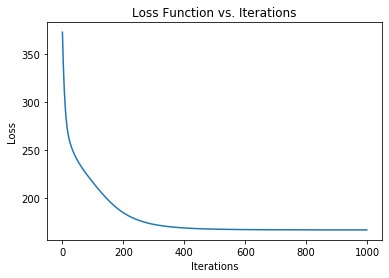

In [25]:
plt.plot(range(0,1000), loss[0:1000])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function vs. Iterations')
plt.show()

### Problem 3.6

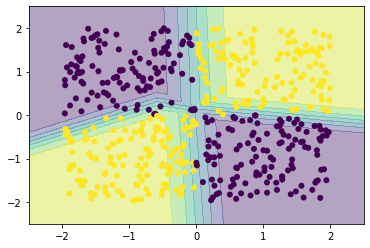

In [6]:
def get_y_hat(x, params):
    W, V, b, c = params
    h = relu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c)
    return y


x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(x_span, y_span)
values = get_y_hat(np.c_[xx.ravel(), yy.ravel()], trajectory[-1])
z = values.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.4)
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()